In [ ]:
#please run and give access
from google.colab import drive
import re
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
#please copy the NOTEEVENTS.csv from MSK team drive, MIMIC III csv folder, to your own drive and change the path (and maybe the name)
#!!!important
#it takes some time
csv_path = '/content/drive/MyDrive/MSK-LLM/NOTEEVENTS.csv'
df = pd.read_csv(csv_path)

<ipython-input-2-2c1b03fe746d>:5: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


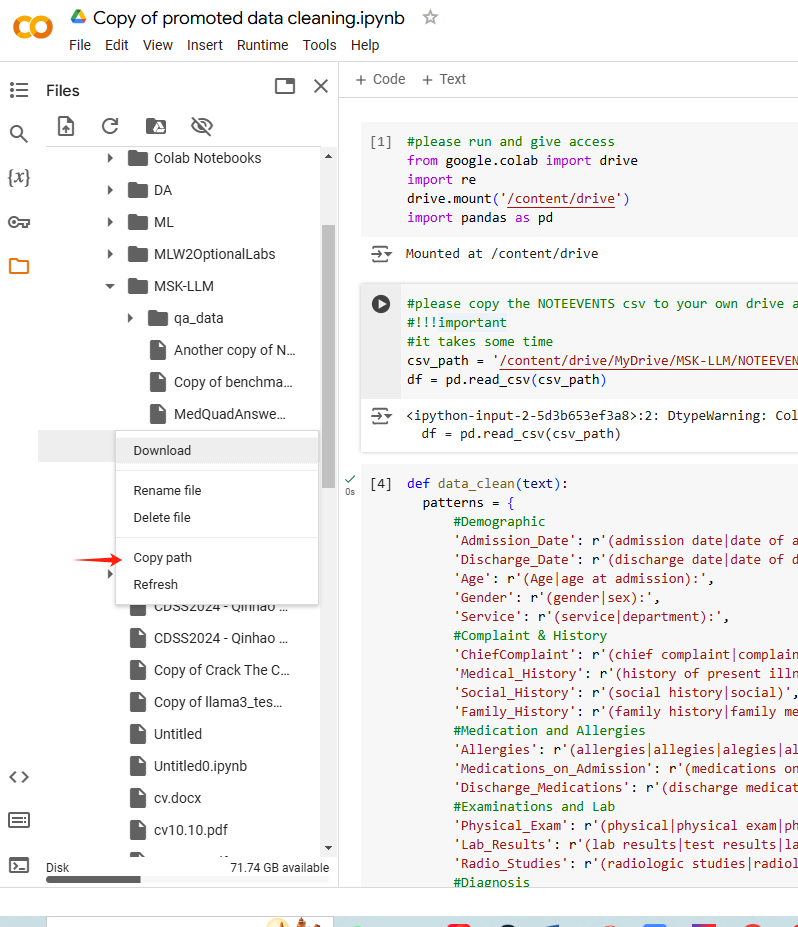![image.png](

)

In [ ]:
# please run!
def data_clean(text):
  patterns = {
      #Demographic
      'Admission_Date': r'(admission date|date of admission):',
      'Discharge_Date': r'(discharge date|date of discharge):',
      'Age': r'(Age|age at admission):',
      'Gender': r'(gender|sex):',
      'Service': r'(service|department):',
      #Complaint & History
      'ChiefComplaint': r'(chief complaint|complaint)',
      'Medical_History': r'(history of present illness|medical history|medical history|major surgical|invasive procedure):',
      'Social_History': r'(social history|social)',
      'Family_History': r'(family history|family medical history|family)',
      #Medication and Allergies
      'Allergies': r'(allergies|allegies|alegies|alergies|allergy|allergic)',
      'Medications_on_Admission': r'(medications on admission|admission medications|medications on transfer)',
      'Discharge_Medications': r'(discharge medications|discharge medications)',
      #Examinations and Lab
      'Physical_Exam': r'(physical|physical exam|physical exam at time of admission):',
      'Lab_Results': r'(lab results|test results|laboratory results|laboratory studies|lab studies|laboratory data upon admission:|admission labs|pertinent results)',
      'Radio_Studies': r'(radiologic studies|radiologic|radiology|radio)',
      #Diagnosis
      'Diagnosis': r'(diagnosis|diagnoses):',
      #Hospital Course and Discharge
      'Discharge_Status': r'(discharge status|discharge status):',
      'Discharge_Instructions': r'(instruction|follow-up plans|follow up|follow-up|instructions|followup instructions|followup):',
      'Discharge_Condition': r'(discharge condition|condition on discharge):',
      'Hospital_Course': r'(hospital course|hospital course by system):',
      #Administrative Details
      'Physician_Details': r'(dictated by)',
      'Job_Number': r'(job#|job number)'
  }

  combined_pattern = '|'.join(f'(?P<{key}>{pattern})' for key, pattern in patterns.items())
  split_pattern = re.compile(combined_pattern, re.IGNORECASE)
  sections = {section: '' for section in patterns}
  current_section = None
  for match in split_pattern.finditer(text.lower()):
      matched_section = match.lastgroup  # Get the named group matched (section name)
      section_start = match.end()  # Find the end of the current match to capture content that follows

      if current_section:
          # Fill the previous section up to this match's start position
          sections[current_section] += text[prev_end:match.start()].strip() + "\n"

      # Update the current section to the newly matched section
      current_section = matched_section
      prev_end = section_start  # Update the previous end position

  # Capture the last section's content after the final match
  if current_section:
      sections[current_section] += text[prev_end:].strip() + "\n"
  return sections

def clean_df(df,start_i,end_i):
  test = pd.DataFrame()
  for i in range(start_i,end_i):
    txt = df['TEXT'][i]
    sec = pd.DataFrame([data_clean(txt)])
    test = pd.concat([test, sec], ignore_index=True)
    if i % 5000 == 0:
      print(i)
  path = '/content/drive/MyDrive/'
  name = str(start_i) +'_'+str(end_i)+'.csv'
  test.to_csv(path+name,index = True)
  return test



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
clean_df(df,833274,9721523)
#change the two indexes, the first one is the same, the second one should plus one.
#for example, if your assigned index is (0-138878), you should enter clean_df(df,0,138879)
#and then find the exported file in My Drive, move it to the Preprocessing Data File in our shared folder.

0


,Admission_Date,Discharge_Date,Age,Gender,Service,ChiefComplaint,Medical_History,Social_History,Family_History,Allergies,...,Physical_Exam,Lab_Results,Radio_Studies,Diagnosis,Discharge_Status,Discharge_Instructions,Discharge_Condition,Hospital_Course,Physician_Details,Job_Number
0,[**2151-7-16**]\n,[**2151-8-4**]\n,,,ADDENDUM:\n,,,,,,...,,,":\nalso included a chest\nCT, which confirmed ...",,,,,,:[**Hospital 1807**]\nMEDQUIST36\n\nD: [**215...,: [**\n1808**]\n
1,[**2118-6-2**]\n,[**2118-6-14**]\n\nDate of Birth:\n,,F\n,MICU and then to [**Doctor Last Name **] Medic...,"s, neurologic changes, rashes,\npalpitations, ...",This is an 81-year-old female\nwith a history ...,": Lives with her husband, Dr. [**Known lastna...",: Noncontributory.\n,or some other type of inflammatory process. A...,...,"Blood pressure 142/76,\nheart rate 100 and reg...",": White count 19, hematocrit 41, platelets\n3...",,1. Tracheomalacia status post tracheal and lef...,The patient will be discharged to [**Hospital1...,The patient is recommended to followup with\nD...,The patient was able to oxygenate on\nroom air...,1. COPD/dyspnea/pneumonia: The patient was in...,:[**Last Name (NamePattern1) 1811**]\nMEDQUIST...,: [**\n1812**]\n
2,[**2119-5-4**]\n,[**2119-5-25**]\n,,,CARDIOTHORACIC\n,":\n81 yo F smoker w/ COPD, severe TBM, s/p tra...","bronchoscopy 3/31,4/2,3,[**6-12**], [**5-17**]...",:\n: The patient is married and worked as a cl...,:\n: (+) FHx CAD; Father with an MI in his 40'...,:\nAmlodipine\n\nAttending:[**Last Name (NameP...,...,Admit H+P\nGeneral-lovely 81 yr old feamle in ...,,,"COPD, Coronary Artery Disease/atypical angina ...",,please update Dr.[**Name (NI) 1816**] [**Telep...,good\n\nDischarge\n,82 y/o female admitted [**2119-5-4**] for cons...,,
3,[**2124-7-21**]\n,[**2124-8-18**]\n,,,MEDICINE\nDIV. OF GASTROENTEROLOGY\nWhen: WEDN...,:\nCOPD exacerbation/Shortness of Breath\n\nMa...,Intubation\narterial line placement\nPICC line...,:\nThe patient is married and worked as a clin...,":\n(+) FHx CAD; Father with an MI in his 40's,...",:\nAmlodipine\n\nAttending:[**First Name3 (LF)...,...,On admission\nVitals: T: BP: 116/46 P: 92 O2: ...,:\nInitial Labs\n[**2124-7-21**] 10:55AM BLOOD...,,Primary:\n1. Chronic Obstructive Pulmonary Dis...,,You were admitted to the hospital with shortne...,Mental Status: Confused - sometimes.\nLevel of...,"87 yo F with h/o CHF, COPD on 5 L oxygen at ba...",,
4,[**2162-3-3**]\n,[**2162-3-25**]\n\nDate of Birth: [**2080-1-4...,,M\n,MEDICINE\n,:\nMr. [**Known lastname 1829**] was seen at [...,"1. Anterior cervical osteotomy, C6-C7, with de...",:\nPatient recently discharged from [**Hospita...,reports patient was very sad and attempted to\...,:\nPatient recorded as having No Known\nto Dru...,...,Phycial exam prior to surgery was not obtained...,:\n====================\n====================\...,==================\n\nCT scan C spine [**2162-...,1. Cervical spondylosis with calcification of ...,,Patient has been made CMO at the request of hi...,Stable to outside facility\n\n\nDischarge\n,Mr. [**Known lastname 1829**] was seen at [**H...,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,[**2101-2-10**]\n,[**2101-2-15**]\n,,,MEDICINE\n,:\nHyperglycemia\n\nMajor Surgical or\n,None\nPatient is an 86 y/o male with type II d...,:\nMr. [**Known lastname 7435**] is a recent w...,:\nHis father died at the age of 63 from liver...,:\nPatient recorded as having No Known\nto Dru...,...,Exam on admission:\nT 96.5 BP 102/63 HR 73 RR ...,":\nLabs on admission [**2-10**]:\nWBC 6.7, Hgb...",,Primary\nHyperglycemia\nAtrial fibrillation\nA...,,1. Please call your PCP or go to the ER if you...,"Good. Afebrile, BP 114/68, HR 108.\n\n\nDischa...",## Hyperglycemia - Mr. [**Known lastname 7435*...,,
997,[**2103-7-17**]\n,[**2103-7-18**]\n,,,MEDICINE\n,:\nRespiratory distress\n\nMajor Surgical or\n,None\nThis is an 89 yo M with history of CAD s...,:\nsignificant as Mr. [**Known lastname 7435**...,:\nHi